In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,roc_auc_score
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder

print("All Libraries imported successfully!")




All Libraries imported successfully!


In [2]:
# load the csv data to a pandas dataframe
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Dataset Shape:",df.shape)
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Dataset Shape: (7043, 21)
Number of rows: 7043
Number of columns: 21


In [4]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [5]:
# Check for Missing Values
print("Missing Value Analysis:")
missing_values = df.isnull().sum()
print(missing_values)



Missing Value Analysis:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Exploratory Data Analysis (EDA)

In [6]:
# Check data types and basic statistics
print("📊 Data Types and Basic Statistics:")
print("="*50)
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)
print("Basic Statistics for Numerical Columns:")
print(df.describe())

📊 Data Types and Basic Statistics:
Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Basic Statistics for Numerical Columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%       

In [7]:
# Analyze the target variable (churn)
print("Target Variable Analysis:")
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"Retained (0): {churn_counts[0]:,} customers ({churn_percentage[0]:.1f}%)")
print(f"Churned (1): {churn_counts[1]:,} customers ({churn_percentage[1]:.1f}%)")

# Check if dataset is balanced
if abs(churn_percentage[0] - churn_percentage[1]) < 10:
    print("\n✅ Dataset is relatively balanced")
else:
    print(f"\n⚠️ Dataset is imbalanced (difference: {abs(churn_percentage[0] - churn_percentage[1]):.1f}%)")


Target Variable Analysis:
Churn Distribution:
Retained (0): 5,174 customers (73.5%)
Churned (1): 1,869 customers (26.5%)

⚠️ Dataset is imbalanced (difference: 46.9%)


/tmp/ipython-input-3418917913.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Retained (0): {churn_counts[0]:,} customers ({churn_percentage[0]:.1f}%)")
/tmp/ipython-input-3418917913.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Churned (1): {churn_counts[1]:,} customers ({churn_percentage[1]:.1f}%)")
/tmp/ipython-input-3418917913.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(churn_percentage[

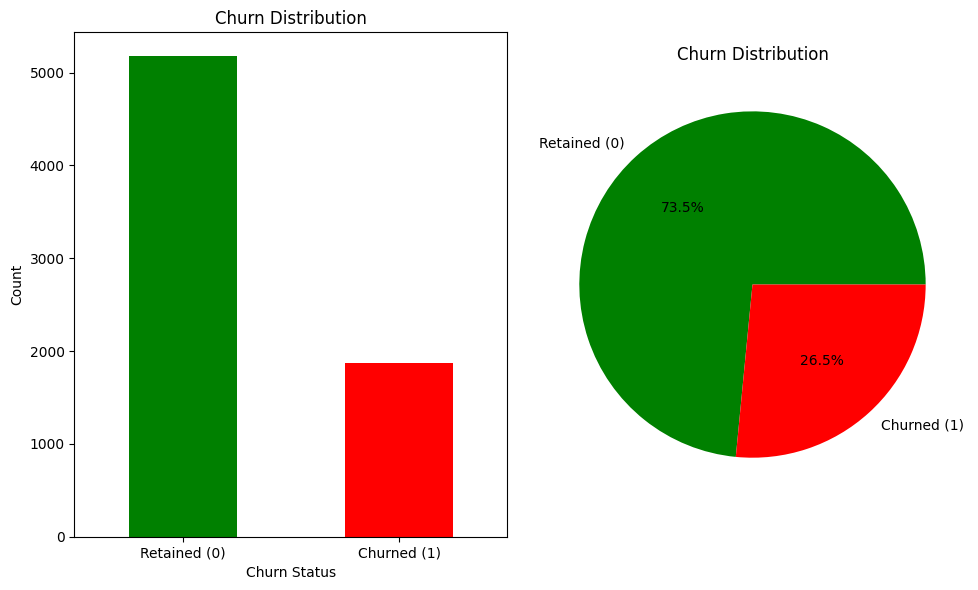

In [8]:
# Visualize target variable distribution
plt.figure(figsize=(10,6))

# create subplot
plt.subplot(1,2,1)
churn_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks([0,1],['Retained (0)', 'Churned (1)'], rotation=0)

plt.subplot(1,2,2)
plt.pie(churn_counts.values,labels=['Retained (0)', 'Churned (1)'],
        colors=['green', 'red'], autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.tight_layout()
plt.show()

In [9]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# printing the unique values in all the columns
numerical_clomns_list = ["tenure","MonthlyCharges","TotalCharges"]

for col in df.columns:
  if col not in numerical_clomns_list:
    print(col, df[col].unique())
    print("-"*50)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
---------------------------------------

In [12]:
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"})

In [13]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(10,5))
  sns.histplot(data=df, x=column_name, kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and medians
  plt.axvline(col_mean, color="red", linestyle="--", label = "Mean")
  plt.axvline(col_median, color="green", linestyle="--", label = "Median")

  plt.legend()
  plt.show()

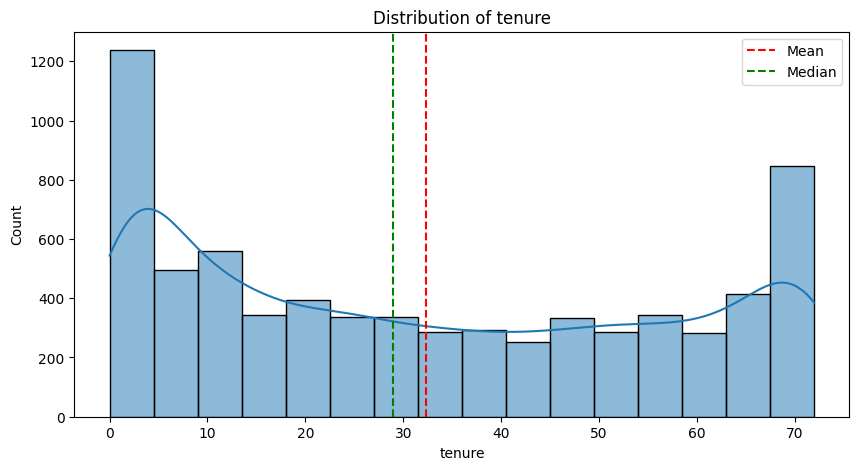

In [16]:
plot_histogram(df,"tenure")

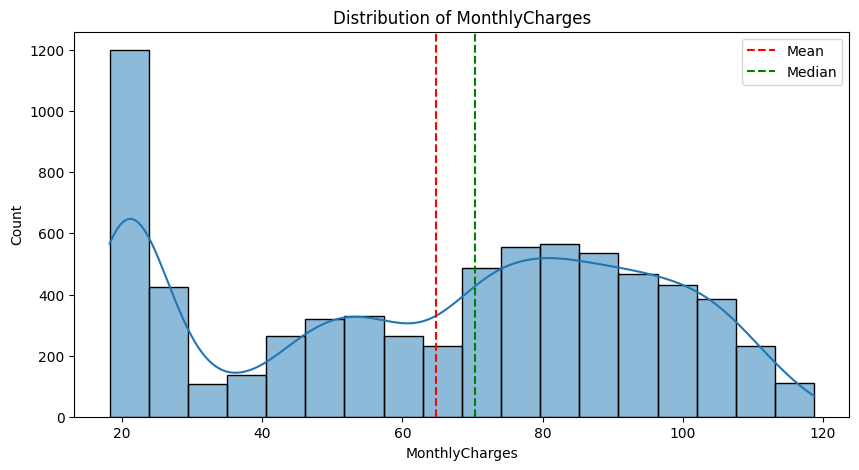

In [17]:
plot_histogram(df,"MonthlyCharges")

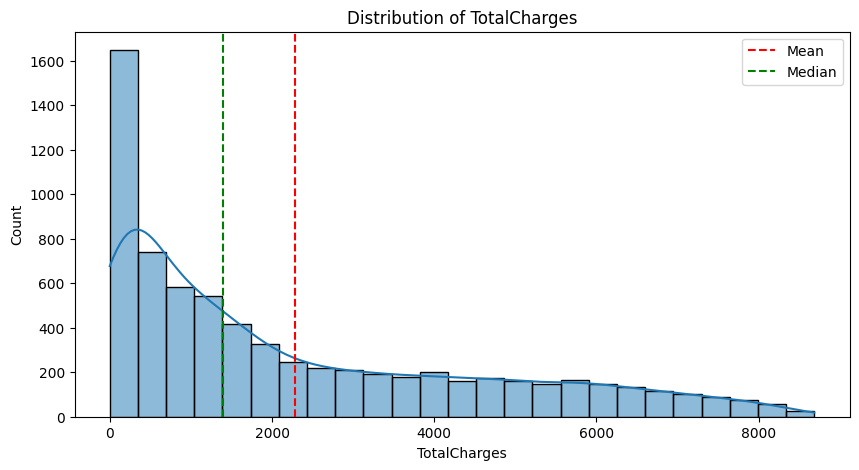

In [18]:
plot_histogram(df,"TotalCharges")

In [19]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(10,5))
  sns.boxplot(y=df[column_name])
  plt.title(f"Distribution of {column_name}")
  plt.ylabel(column_name)
  plt.show()

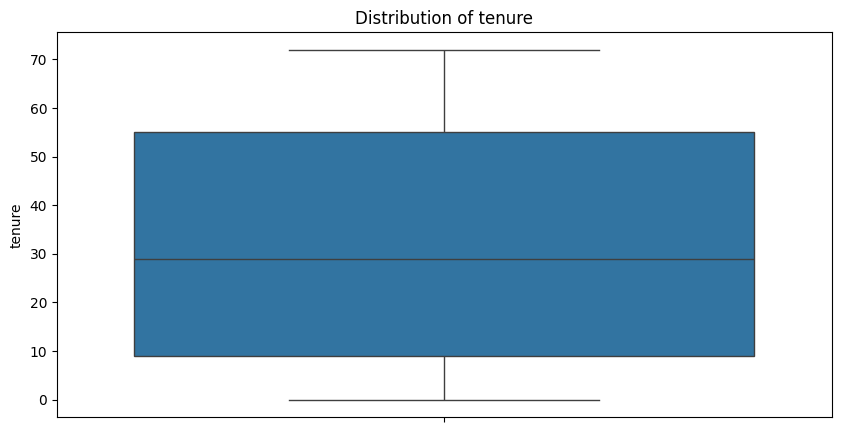

In [20]:
plot_boxplot(df,"tenure")

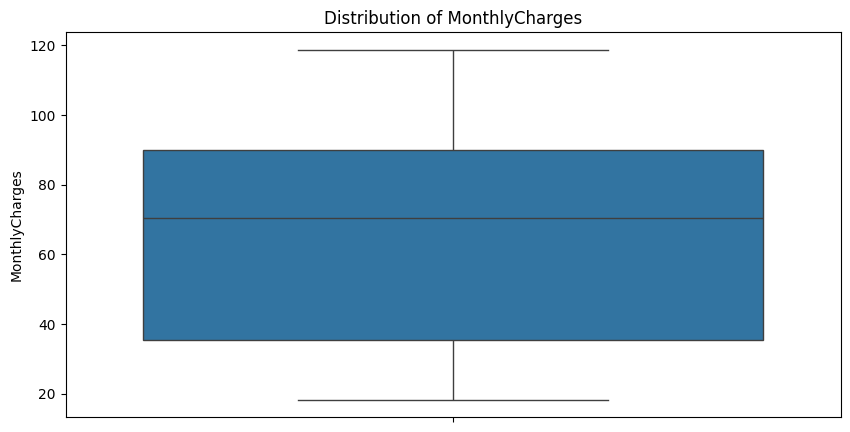

In [21]:
plot_boxplot(df,"MonthlyCharges")

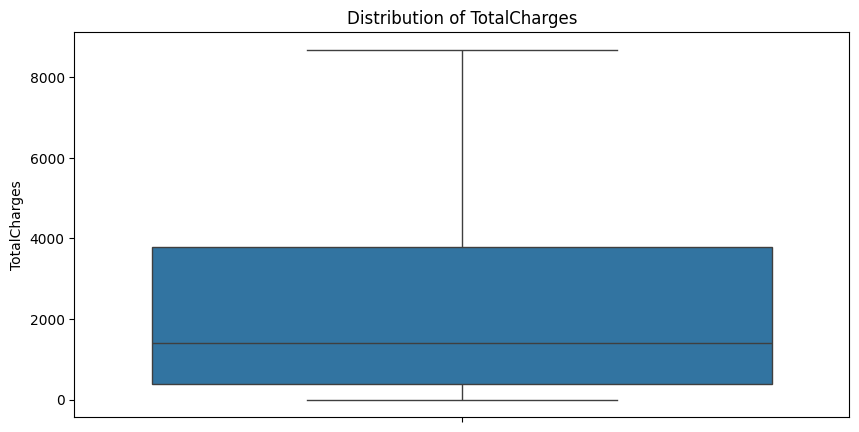

In [22]:
plot_boxplot(df,"TotalCharges")

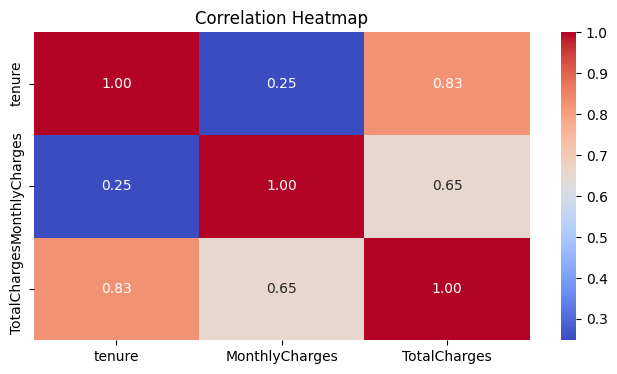

In [23]:
#correlation matrix -heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

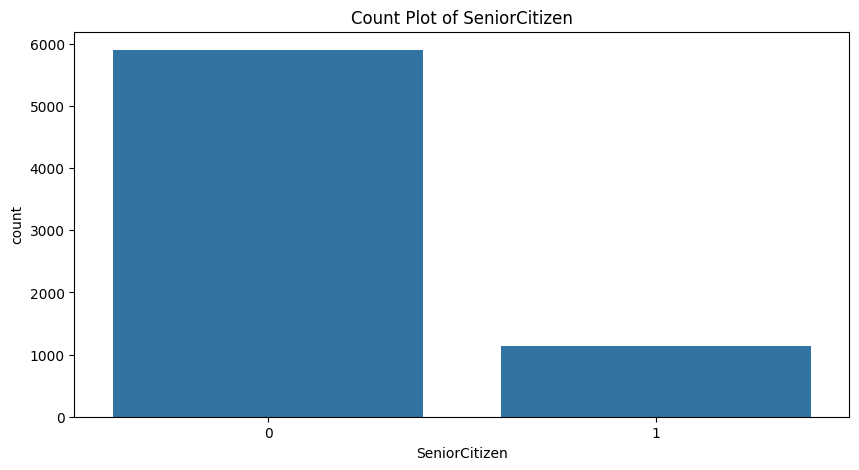

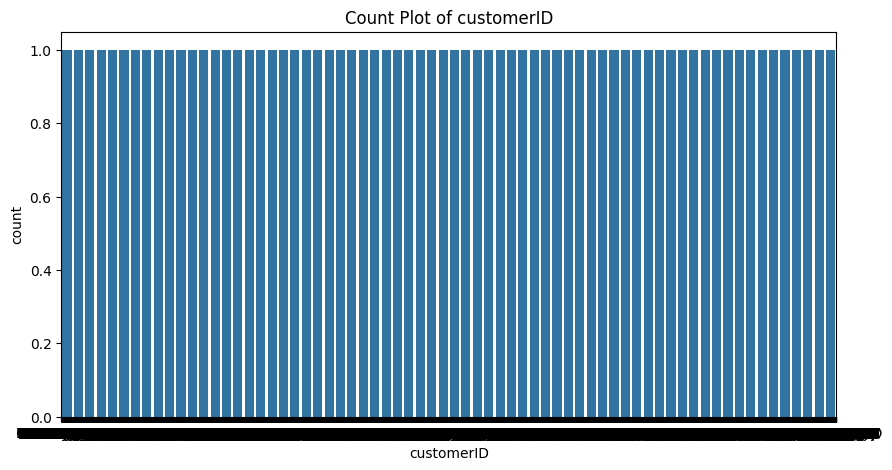

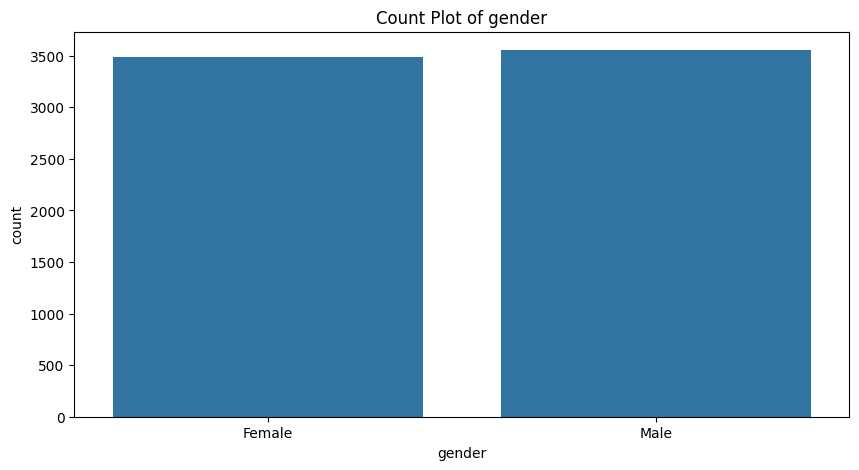

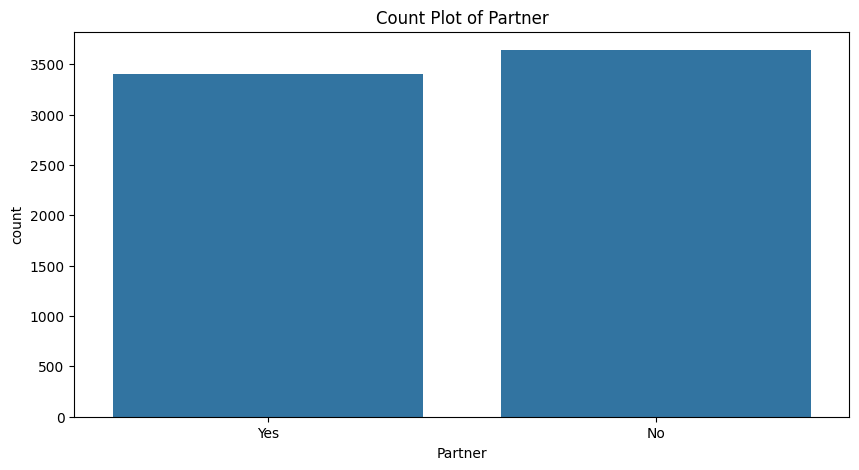

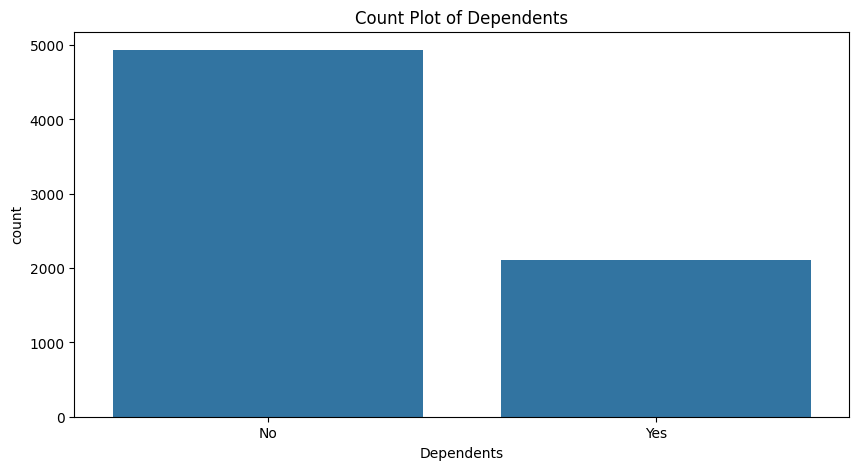

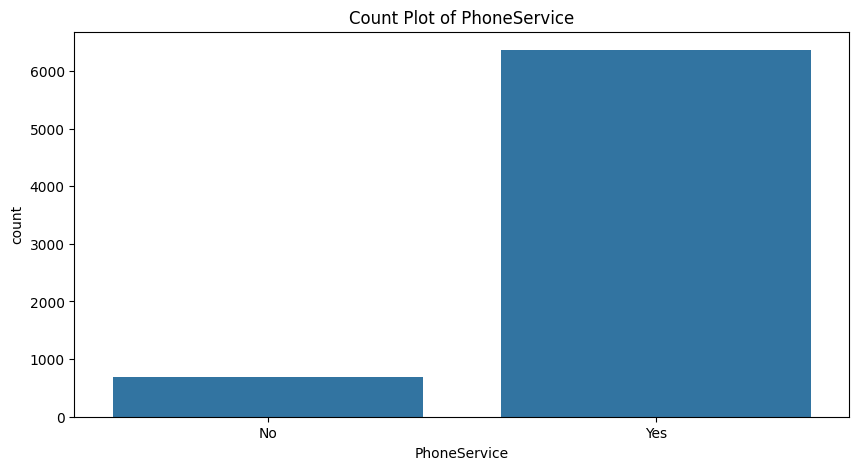

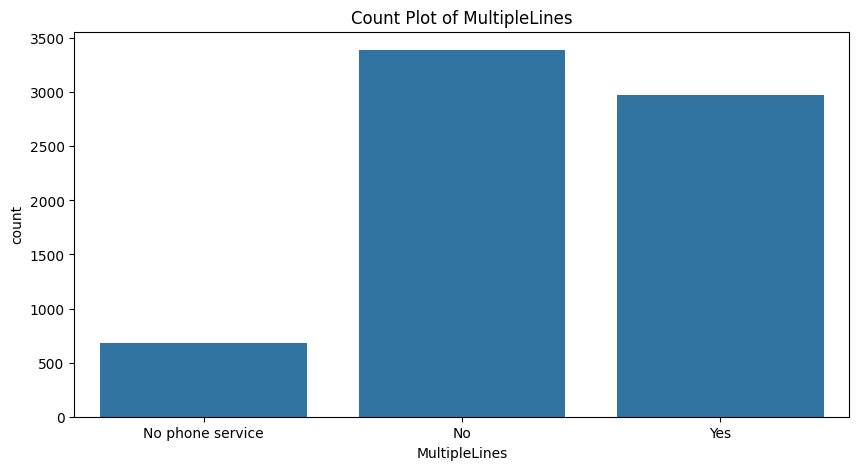

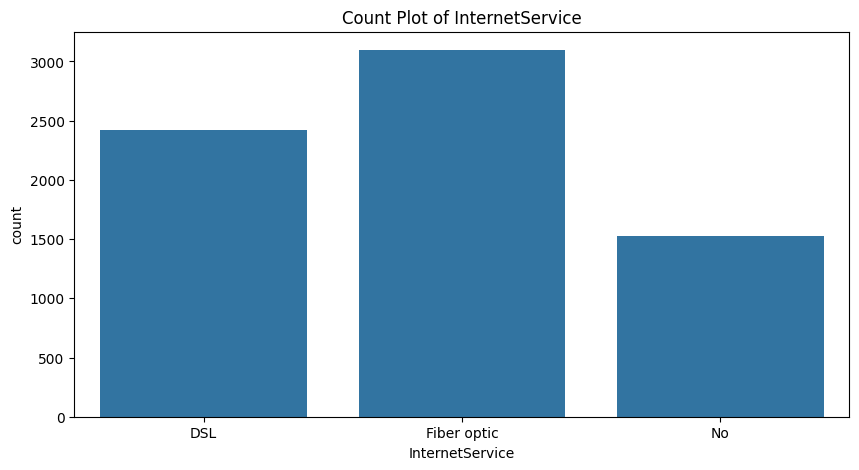

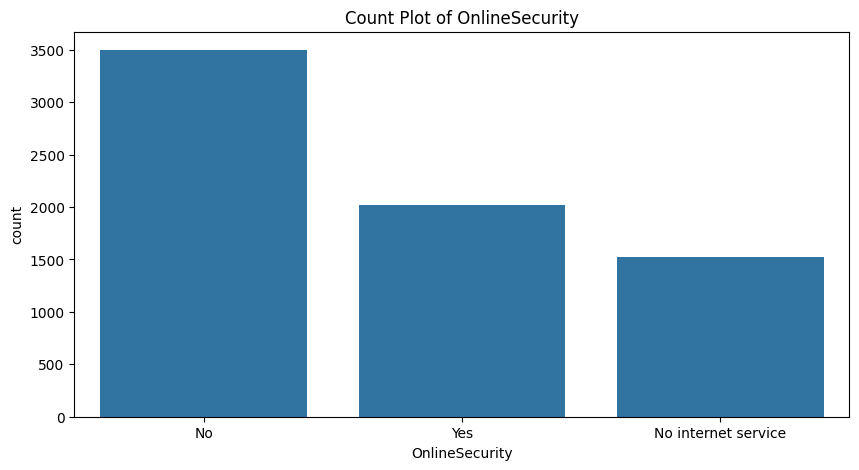

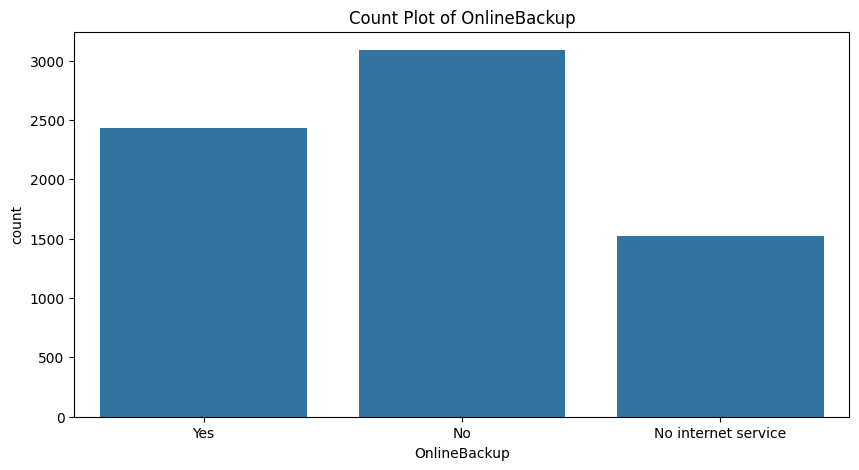

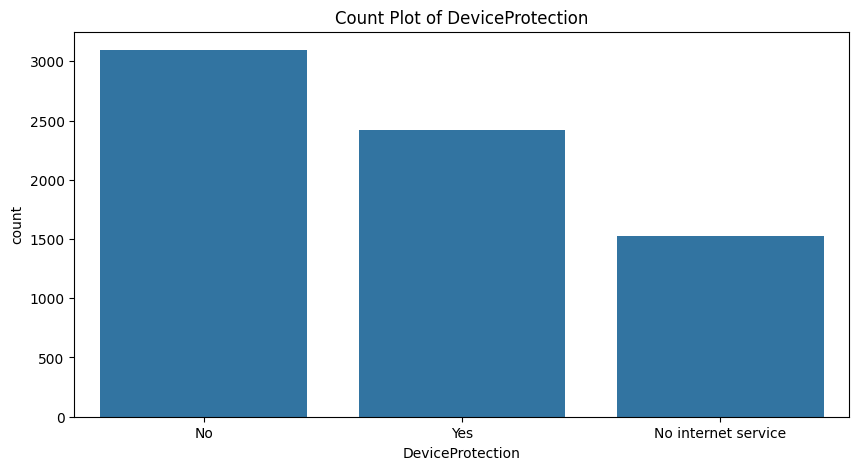

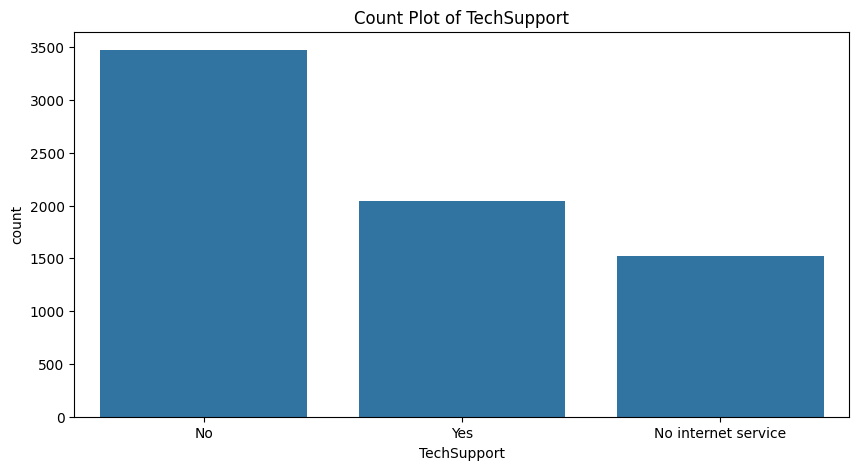

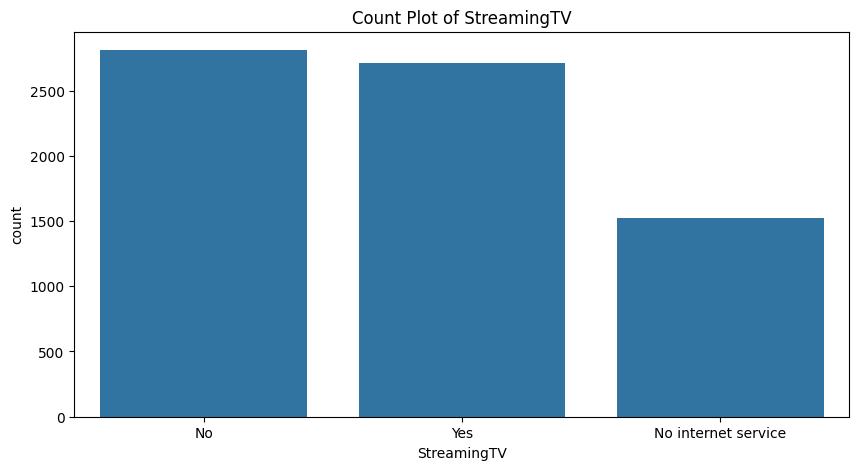

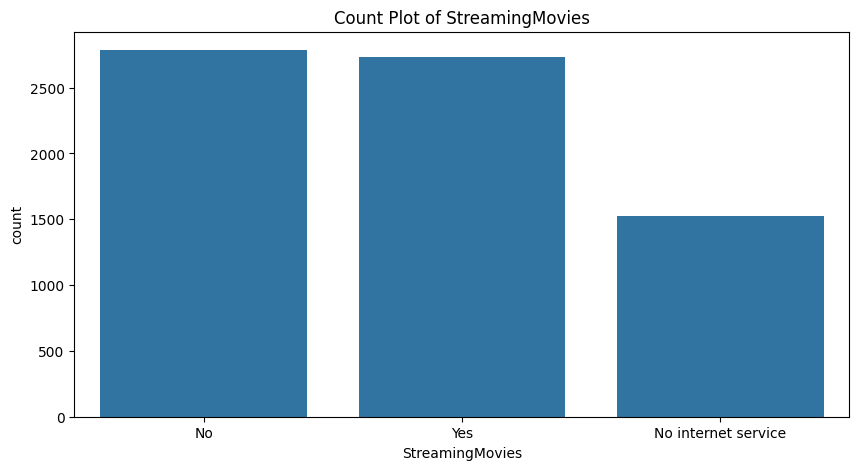

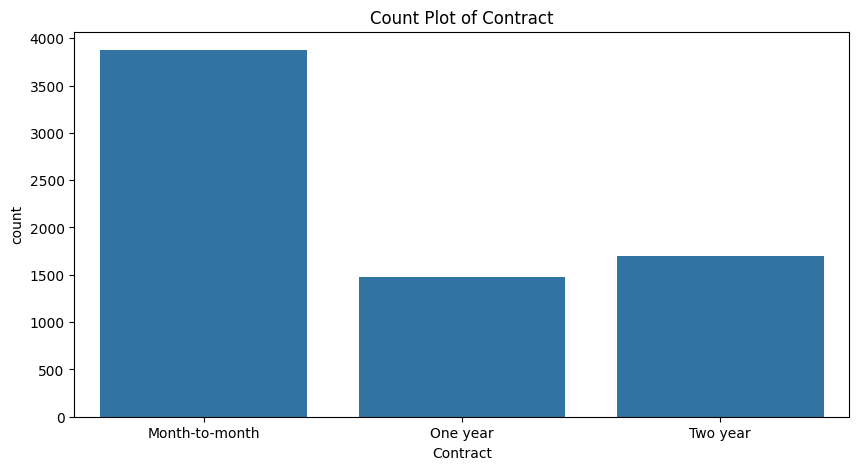

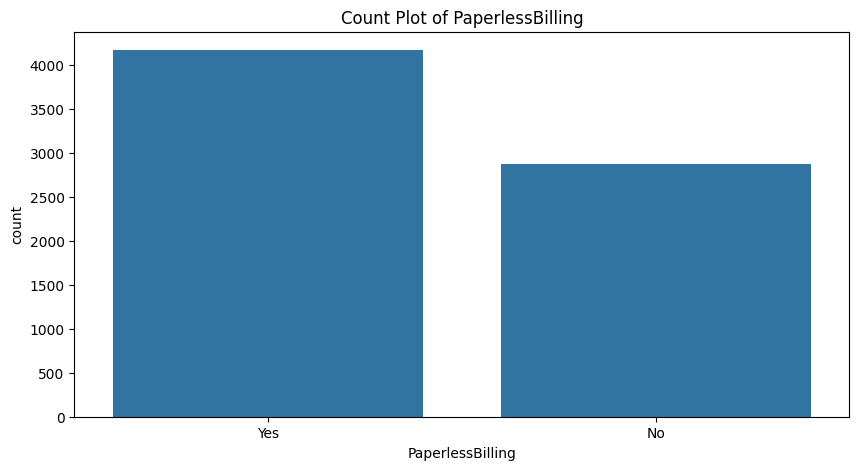

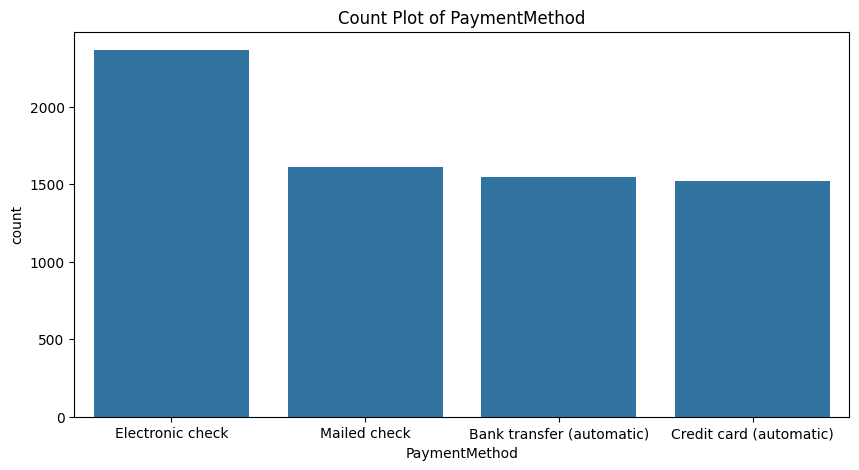

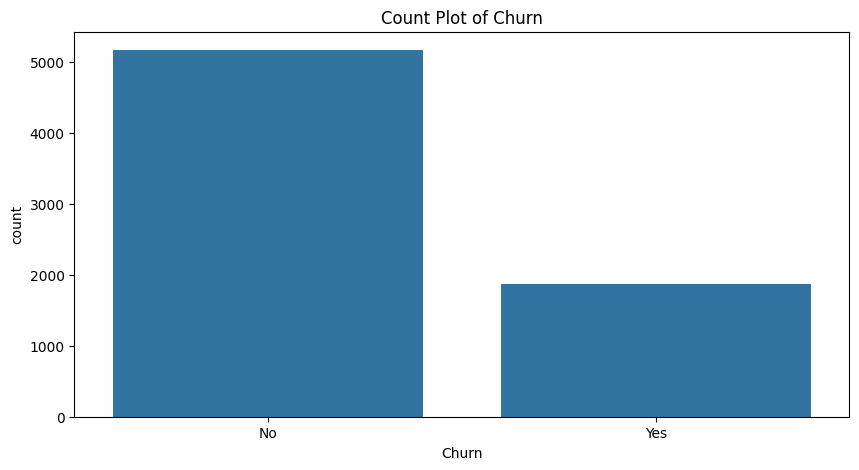

In [25]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()


In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})

/tmp/ipython-input-3085587267.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})


In [28]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [29]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns
object_columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [30]:
# initialize a dictionary to save the encoders
encoders={}

# identifying columns with object data type excluding 'customerID' and 'Churn' (which is already numerical)
object_columns_to_encode = df.select_dtypes(include="object").columns.tolist()
# Exclude 'customerID' as it's dropped later and 'Churn' as it's already processed
# Note: 'TotalCharges' is converted to float before this cell, so it won't be in df.select_dtypes(include='object')
if 'customerID' in object_columns_to_encode:
    object_columns_to_encode.remove('customerID')


# apply label encoding and store the encoders
for column in object_columns_to_encode:
  encoder = LabelEncoder()
  df[column] = encoder.fit_transform(df[column])
  encoders[column] = encoder

# save the encoders to a pickle file
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

print("Encoders saved!")

Encoders saved!


In [31]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [33]:
# splitting the features and target
x = df.drop(columns=["Churn", "customerID"])
y = df["Churn"]

In [34]:
# Stratified split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)
print("Train target distribution:\n", pd.Series(y_train).value_counts(normalize=True))

Train shape: (5634, 19)
Test shape: (1409, 19)
Train target distribution:
 Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64


In [35]:
# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaling complete!")

Scaling complete!


In [36]:
# Basic SVM with class weights for imbalance
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42)
svm_model.fit(x_train_scaled, y_train)

print("SVM trained!")

SVM trained!


In [37]:
# Apply SMOTE to train data only
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

# Train SVM on resampled data
svm_smote = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_smote.fit(x_train_smote, y_train_smote)

print("SVM with SMOTE trained!")
print("Post-SMOTE train distribution:\n", pd.Series(y_train_smote).value_counts(normalize=True))
# Use svm_smote for evaluation below

SVM with SMOTE trained!
Post-SMOTE train distribution:
 Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [38]:
# Predictions (use svm_model or svm_smote)
y_pred = svm_model.predict(x_test_scaled)  # Or svm_smote.predict(x_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("AUC-ROC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7437899219304471
F1-Score: 0.6147278548559232
AUC-ROC: 0.7521764964220207

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409


Confusion Matrix:
 [[760 275]
 [ 86 288]]


In [39]:
# RF doesn't require scaling—use x_train, x_test directly
print("Using raw encoded features for RF.")

Using raw encoded features for RF.


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Basic RF with class weights for imbalance
rf_model = RandomForestClassifier(
    n_estimators=100,  # Trees
    max_depth=10,  # Limit depth to avoid overfit
    class_weight='balanced',  # Handles imbalance
    random_state=42
)
rf_model.fit(x_train, y_train)

print("Random Forest trained!")

# Optional: With SMOTE (for better minority handling)
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
# rf_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# rf_smote.fit(x_train_smote, y_train_smote)

Random Forest trained!


RandomForestClassifier(max_depth=10, random_state=42)

In [41]:
# Tune key params (n_estimators, max_depth) for boost
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold for speed

grid_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid_rf, cv=cv, scoring='f1', n_jobs=-1, verbose=1
)
grid_rf.fit(x_train, y_train)
rf_tuned = grid_rf.best_estimator_
print("Best params:", grid_rf.best_params_)
print("Best CV F1:", grid_rf.best_score_)
# Use rf_tuned below

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best CV F1: 0.6308925734054771


In [42]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Predictions (use rf_model or rf_tuned)
y_pred_rf = rf_model.predict(x_test)  # Or rf_tuned.predict(x_test)
y_prob_rf = rf_model.predict_proba(x_test)[:, 1]  # For AUC

accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_prob_rf)

print(f"Test Accuracy: {accuracy:.2f}")
print("F1-Score:", f1)
print("AUC-ROC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Test Accuracy: 0.77
F1-Score: 0.6078665077473182
AUC-ROC: 0.8349091942442325

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.68      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409


Confusion Matrix:
 [[825 210]
 [119 255]]


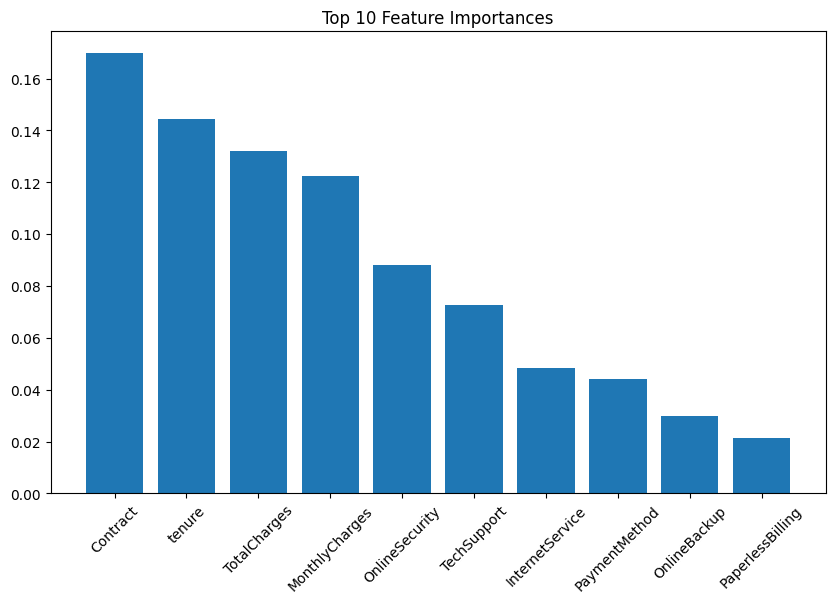

In [43]:
import matplotlib.pyplot as plt

# Plot top 10 features
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices])
plt.xticks(range(10), [x_train.columns[i] for i in indices], rotation=45)
plt.show()

In [44]:
# Save RF model and components
# Reload encoders to ensure it's the correct dict of LabelEncoder objects
with open("encoders.pkl", "rb") as f:
    correct_encoders = pickle.load(f)

model_data = {
    "model": rf_model,  # Or rf_tuned
    "encoders": correct_encoders,
    "feature_names": x.columns.tolist()
}

with open("rf_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("RF model saved!")

RF model saved!


In [45]:
input_data = {
    'gender':'Male',
    'SeniorCitizen':0,
    'Partner':'No',
    'Dependents':'No',
    'tenure':34,
    'PhoneService':'Yes',
    'MultipleLines':'No',
    'InternetService':'DSL',
    'OnlineSecurity':'Yes',
    'OnlineBackup':'No',
    'DeviceProtection':'Yes',
    'TechSupport':'No',
    'StreamingTV':'No',
    'StreamingMovies':'No',
    'Contract':'One year',
    'PaperlessBilling':'No',
    'PaymentMethod':'Mailed check',
    'MonthlyCharges':56.95,
    'TotalCharges':1889.5
}

# Convert input_data to a DataFrame for easier processing
input_df_raw = pd.DataFrame([input_data])

# Correctly load the model and encoders
with open("rf_churn_model.pkl","rb") as f:
  loaded_data = pickle.load(f)

loaded_model = loaded_data["model"]
loaded_encoders = loaded_data["encoders"]
loaded_feature_names = loaded_data["feature_names"]

# Create a copy to store encoded data and ensure feature order
input_df_encoded = input_df_raw.copy()

# Print original dtypes and values before encoding
print("--- Original input_df_raw dtypes ---")
print(input_df_raw.dtypes)
print("\n--- Original input_df_raw values for categorical columns ---")
for col in loaded_encoders.keys():
    if col in input_df_raw.columns:
        print(f"{col}: {input_df_raw[col].iloc[0]}")

# encode categorical features using the loaded encoders
for column, encoder in loaded_encoders.items():
  if column in input_df_encoded.columns:
    try:
        print(f"\nAttempting to encode column: {column}. Current value: {input_df_encoded[column].iloc[0]}")
        input_df_encoded[column] = encoder.transform(input_df_encoded[column])
        print(f"Successfully encoded {column}. New value: {input_df_encoded[column].iloc[0]}")
    except ValueError as e:
        print(f"Failed to encode {column}: {e}")
        print(f"Classes seen by encoder for {column}: {encoder.classes_}")
        raise # re-raise the error to halt execution

# Print encoded dtypes and values after encoding
print("\n--- Encoded input_df_encoded dtypes ---")
print(input_df_encoded.dtypes)
print("\n--- Encoded input_df_encoded values for categorical columns ---")
for col in loaded_encoders.keys():
    if col in input_df_encoded.columns:
        print(f"{col}: {input_df_encoded[col].iloc[0]}")


# Ensure the order of columns matches the training data features
# And select only the features the model expects
final_input_for_prediction = input_df_encoded[loaded_feature_names]

# make a new prediction
prediction = loaded_model.predict(final_input_for_prediction)
pred_prob = loaded_model.predict_proba(final_input_for_prediction)

print(prediction)

# results
print(f"Prediction: {"Churn" if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")

--- Original input_df_raw dtypes ---
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

--- Original input_df_raw values for categorical columns ---
gender: Male
Partner: No
Dependents: No
PhoneService: Yes
MultipleLines: No
InternetService: DSL
OnlineSecurity: Yes
OnlineBackup: No
DeviceProtection: Yes
TechSupport: No
StreamingTV: No
StreamingMovies: No
Contract: One year
PaperlessBilling: No
PaymentMethod: Mailed check

Attempting to encode column: gender. Current value: Male
Successfully encoded 